This project is a repetition of single-cell from `GSE169396`. Reference: 'Single-cell RNA sequencing of human femmoral head in vivo.'

## Step1: Load data

In [4]:
import pandas as pd
import scanpy as sc
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import os
%matplotlib notebook

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

path_working = "E:\\single_cell\\BoneM"
os.chdir(path_working)
results_file = 'bone.h5ad'



scanpy==1.9.6 anndata==0.10.2 umap==0.5.4 numpy==1.24.3 scipy==1.11.1 pandas==2.1.1 scikit-learn==1.3.0 statsmodels==0.14.0 igraph==0.10.8 pynndescent==0.5.10


In [5]:
path_files = os.path.join(path_working,"GSE169396_RAW")
files_name = [x[:14] for x in os.listdir(path_files)]
files_name=list(set(files_name))

In [6]:
dict_data={}
for i in range(len(files_name)):
    dict_data[i]=sc.read_10x_mtx(path_files, prefix=files_name[i],var_names='gene_symbols',cache=True)
    dict_data[i].obs['batch']=files_name[i].split("_")[1]
    dict_data[i].obs["BATCH"]=files_name[i].split("_")[1]

... reading from cache file cache\E-single_cell-BoneM-GSE169396_RAW-GSM5201883_S1_matrix.h5ad


d:\Users\lee\anaconda3\Lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


... reading from cache file cache\E-single_cell-BoneM-GSE169396_RAW-GSM5201886_S4_matrix.h5ad


d:\Users\lee\anaconda3\Lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


... reading from cache file cache\E-single_cell-BoneM-GSE169396_RAW-GSM5201885_S3_matrix.h5ad


d:\Users\lee\anaconda3\Lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


... reading from cache file cache\E-single_cell-BoneM-GSE169396_RAW-GSM5201884_S2_matrix.h5ad


d:\Users\lee\anaconda3\Lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [7]:
data_all=sc.AnnData.concatenate(dict_data[0],dict_data[1],dict_data[2],dict_data[3],batch_key='BATCH')
data_all.obs

d:\Users\lee\anaconda3\Lib\site-packages\anndata\_core\anndata.py:1823: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


,batch,BATCH
AAACCCAAGATGGTAT-1-0,S1,0
AAACCCACAATCGCGC-1-0,S1,0
AAACCCACACTTCATT-1-0,S1,0
AAACCCACAGGAACCA-1-0,S1,0
AAACCCAGTAGTCCTA-1-0,S1,0
...,...,...
TTTGTTGGTTCCGGTG-1-3,S2,3
TTTGTTGGTTTCGCTC-1-3,S2,3
TTTGTTGTCACAACCA-1-3,S2,3
TTTGTTGTCCAGTTCC-1-3,S2,3


In [8]:
data_all

AnnData object with n_obs × n_vars = 32723 × 33538
    obs: 'batch', 'BATCH'
    var: 'gene_ids', 'feature_types'

## Step2 Preprocessing

normalizing counts per cell
    finished (0:00:00)


<IPython.core.display.Javascript object>


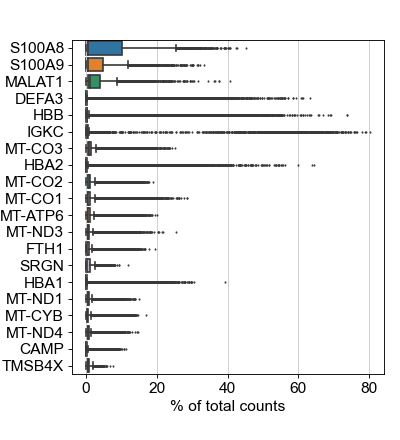

d:\Users\lee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\lee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\lee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\lee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical

In [9]:
sc.pl.highest_expr_genes(data_all, n_top=20)

In [10]:
sc.pp.filter_cells(data_all, min_genes=200)
sc.pp.filter_genes(data_all, min_cells=3)

filtered out 1140 cells that have less than 200 genes expressed
filtered out 10949 genes that are detected in less than 3 cells


In [11]:
data_all.var['mt'] = data_all.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(data_all, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

d:\Users\lee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<IPython.core.display.Javascript object>


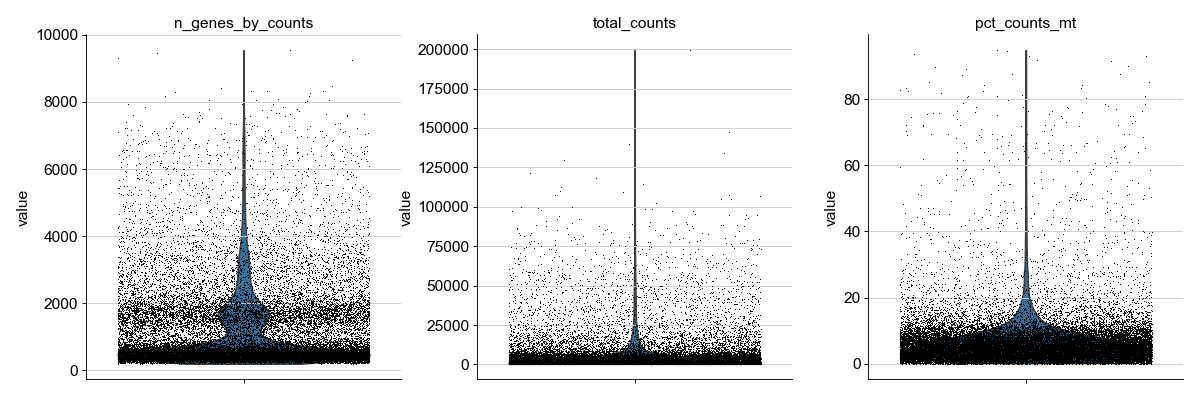

d:\Users\lee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\lee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\lee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\lee\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
d:\Users\lee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWa

In [12]:
sc.pl.violin(data_all,['n_genes_by_counts','total_counts','pct_counts_mt'], jitter=0.4, multi_panel=True)

<IPython.core.display.Javascript object>


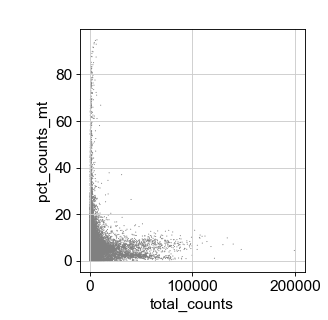

<IPython.core.display.Javascript object>


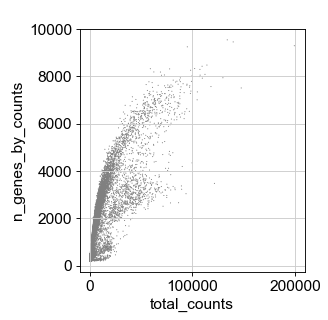

In [13]:
sc.pl.scatter(data_all,x='total_counts',y='pct_counts_mt')
sc.pl.scatter(data_all,x='total_counts',y='n_genes_by_counts')

In [14]:
data_all = data_all[data_all.obs.n_genes_by_counts < 5000, :]
data_all = data_all[data_all.obs.pct_counts_mt < 20, :]

In [15]:
sc.pp.normalize_total(data_all,target_sum=1e4)

normalizing counts per cell


d:\Users\lee\anaconda3\Lib\site-packages\scanpy\preprocessing\_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


    finished (0:00:00)


In [16]:
sc.pp.log1p(data_all)

extracting highly variable genes


d:\Users\lee\anaconda3\Lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


<IPython.core.display.Javascript object>


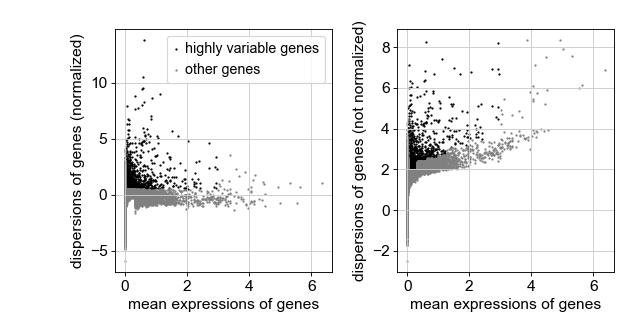

In [17]:
sc.pp.highly_variable_genes(data_all, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(data_all)

In [18]:
data_all.raw=data_all
data_all = data_all[:,data_all.var.highly_variable]
sc.pp.regress_out(data_all,['total_counts','pct_counts_mt'])
sc.pp.scale(data_all,max_value=10)

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:01:12)


## Step3 PCA


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:06)


<IPython.core.display.Javascript object>


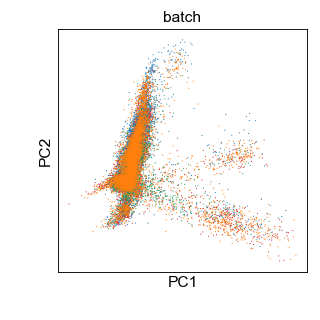

d:\Users\lee\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
d:\Users\lee\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


In [19]:
sc.tl.pca(data_all,svd_solver='arpack')
sc.pl.pca(data_all,color='batch')

<IPython.core.display.Javascript object>


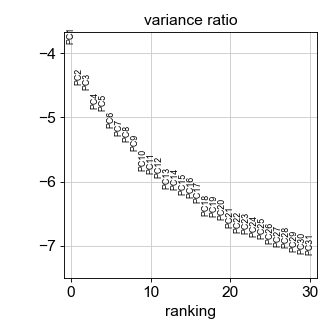

In [20]:
sc.pl.pca_variance_ratio(data_all,log=True)

In [21]:
data_all.write(results_file)
data_all

AnnData object with n_obs × n_vars = 29893 × 4793
    obs: 'batch', 'BATCH', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'batch_colors'
    obsm: 'X_pca'
    varm: 'PCs'

## Step4 Neighborhood graph

In [22]:
sc.pp.neighbors(data_all,n_neighbors=15, n_pcs=45)
sc.tl.leiden(data_all)
sc.tl.paga(data_all)
sc.pl.paga(data_all,plot=False)
sc.tl.umap(data_all, init_pos='paga')

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:14)
running Leiden clustering
    finished: found 31 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:01)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:14)


<IPython.core.display.Javascript object>


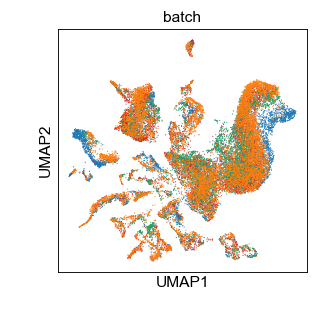

d:\Users\lee\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
d:\Users\lee\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


In [23]:
sc.pl.umap(data_all,color=["batch"])

<IPython.core.display.Javascript object>


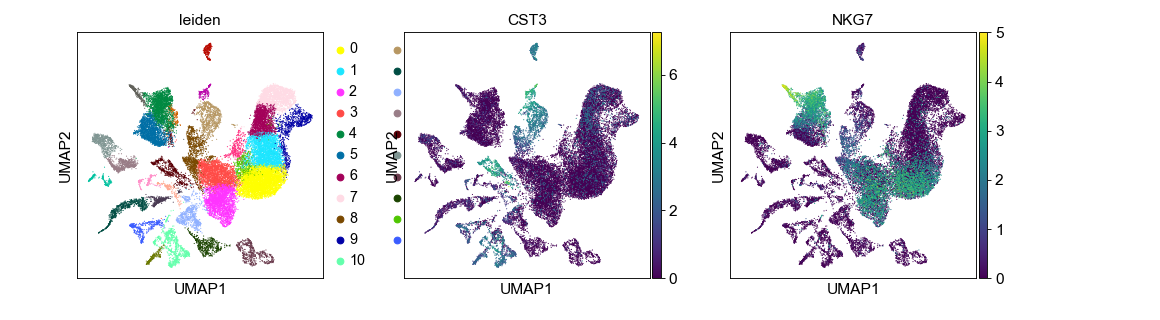

d:\Users\lee\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
d:\Users\lee\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


In [24]:
sc.pl.umap(data_all, color=['leiden', 'CST3', 'NKG7'])

<IPython.core.display.Javascript object>


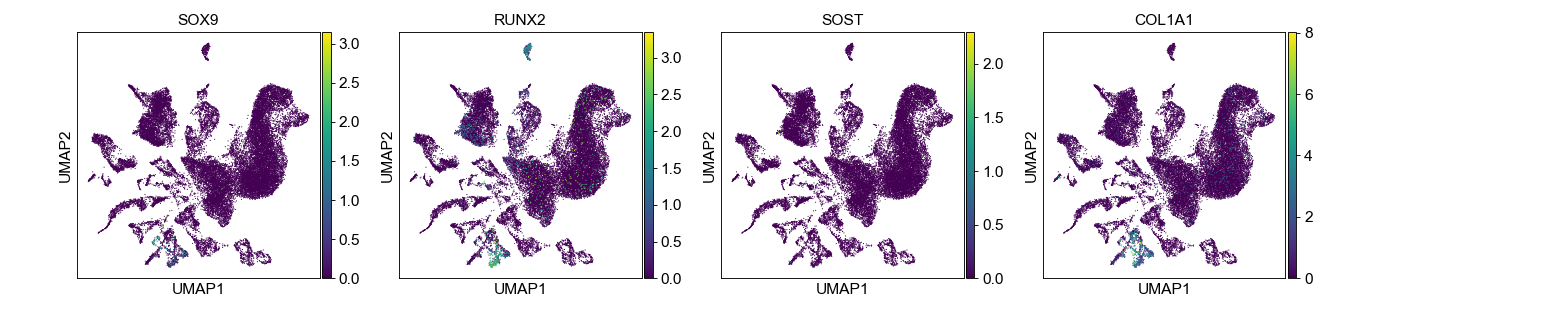

In [34]:
sc.pl.umap(data_all,color=['SOX9','RUNX2','SOST','COL1A1'])

In [25]:
data_all.write(results_file)

## Step5 Finding marker genes

In [2]:
data_all = sc.read(results_file)

d:\Users\lee\anaconda3\Lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:07)


d:\Users\lee\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
d:\Users\lee\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
d:\Users\lee\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:401: PerformanceWarning: DataFrame is highly fragmented.  This is usually the res

<IPython.core.display.Javascript object>


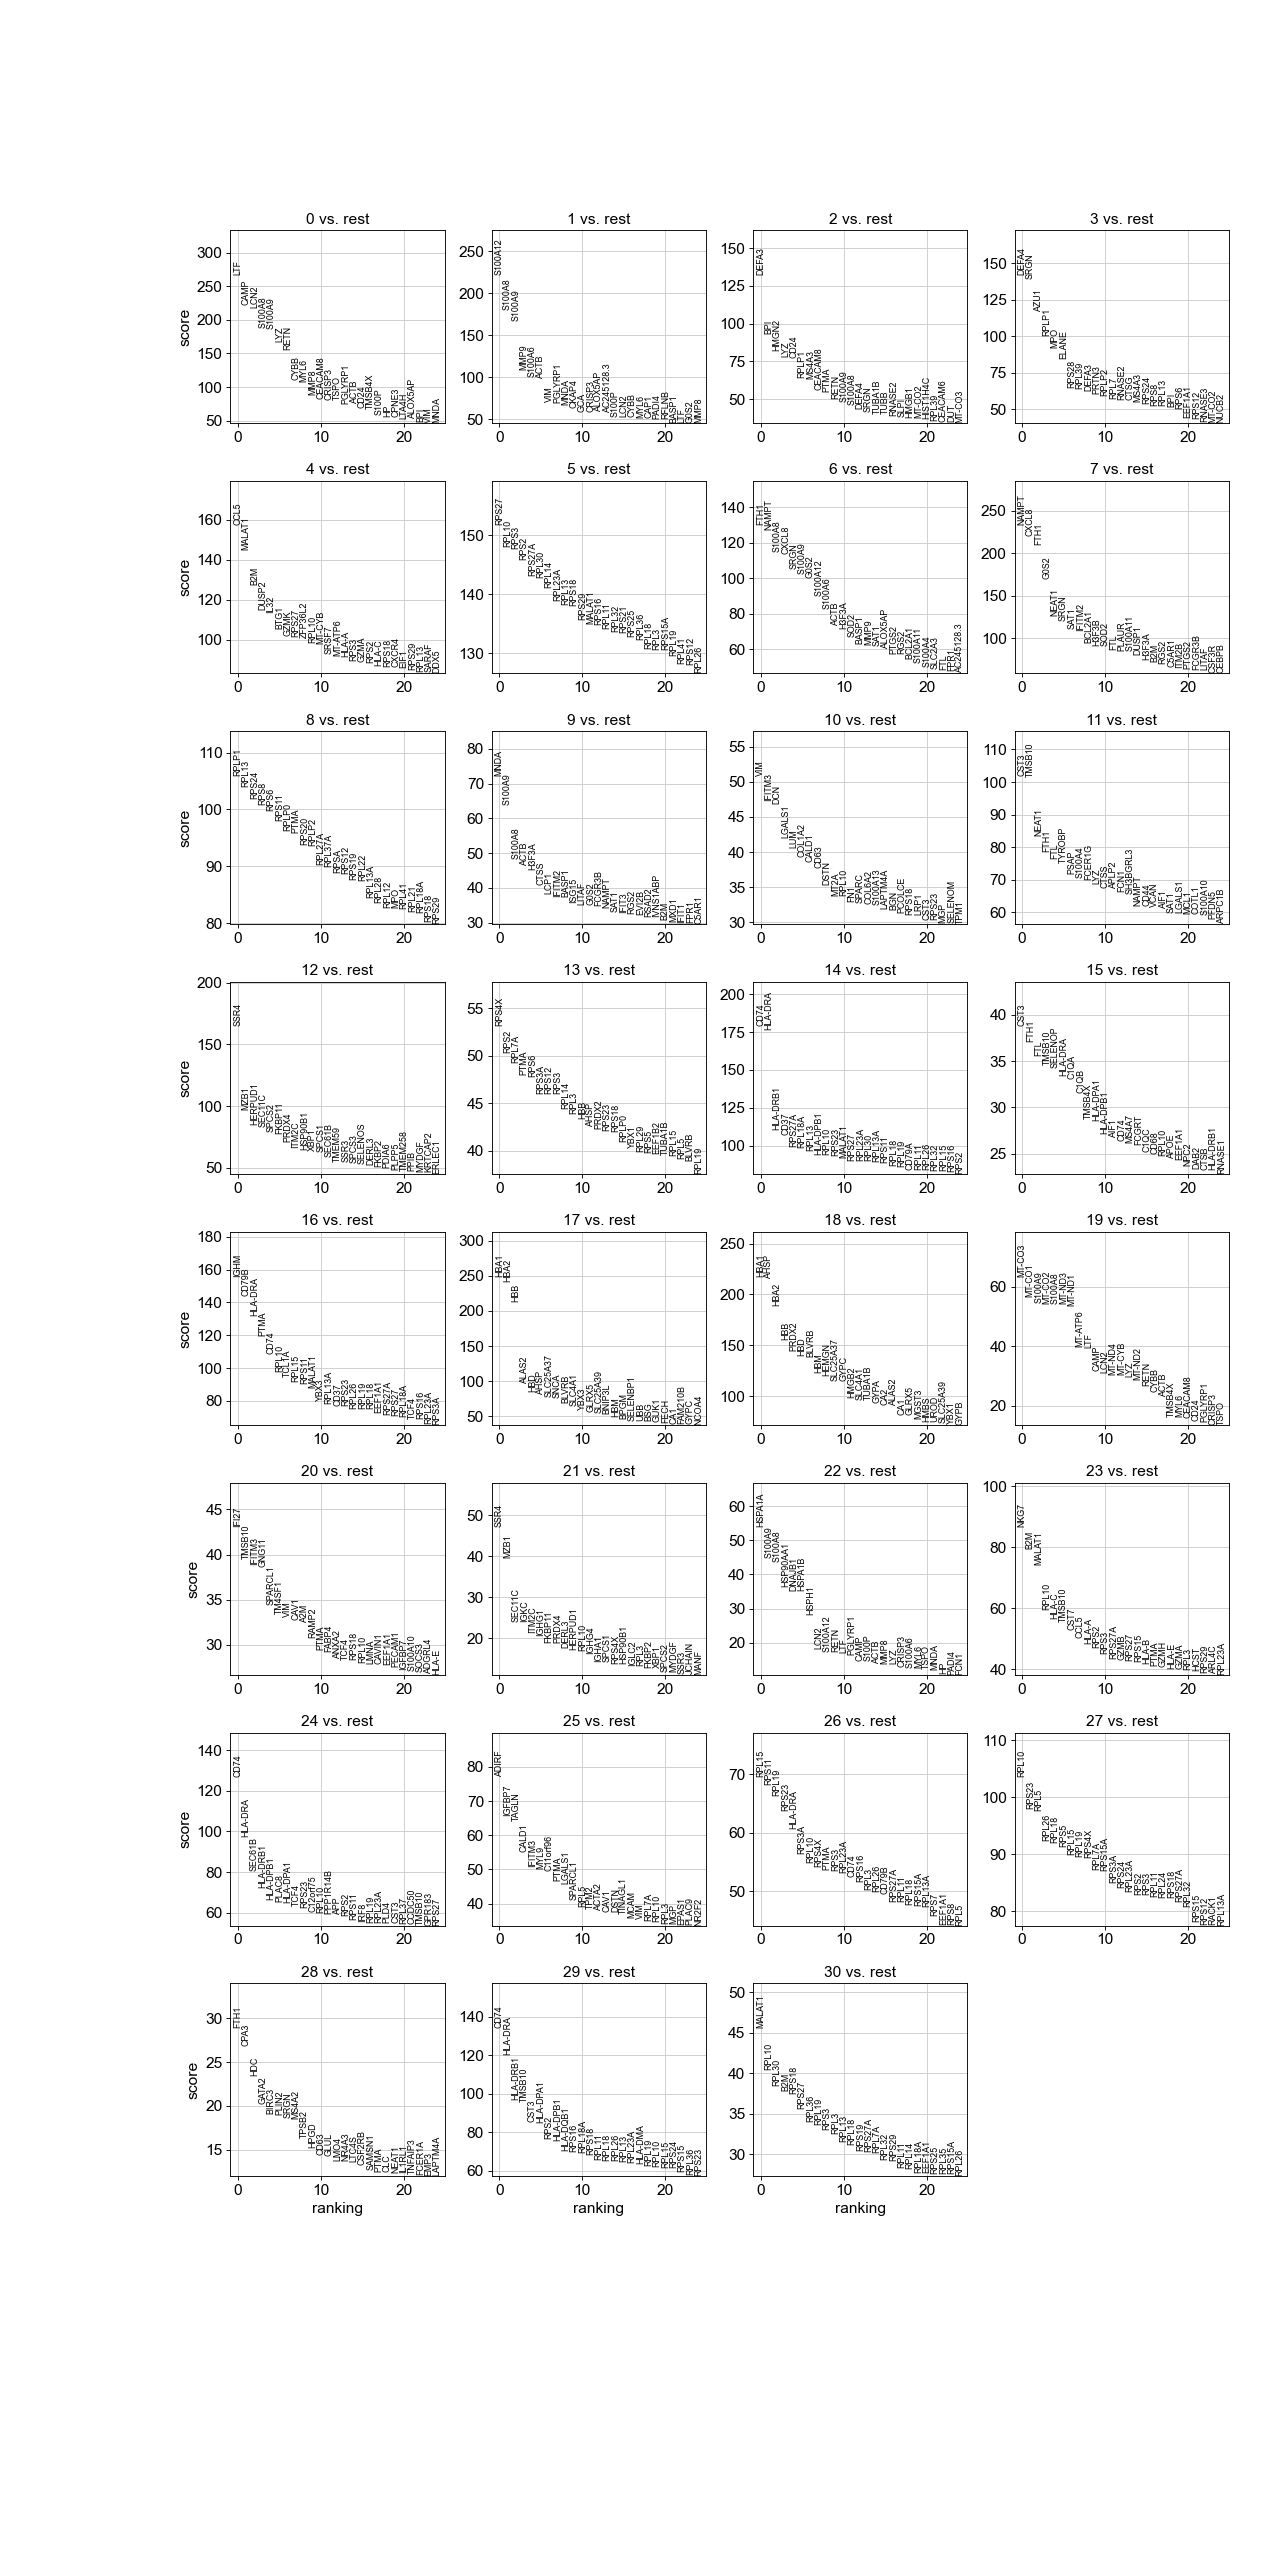

In [26]:
sc.tl.rank_genes_groups(data_all, 'leiden', method='t-test')
sc.pl.rank_genes_groups(data_all, n_genes=25, sharey=False)

ranking genes


d:\Users\lee\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished (0:01:30)


d:\Users\lee\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
d:\Users\lee\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
d:\Users\lee\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:401: PerformanceWarning: DataFrame is highly fragmented.  This is usually the res

<IPython.core.display.Javascript object>


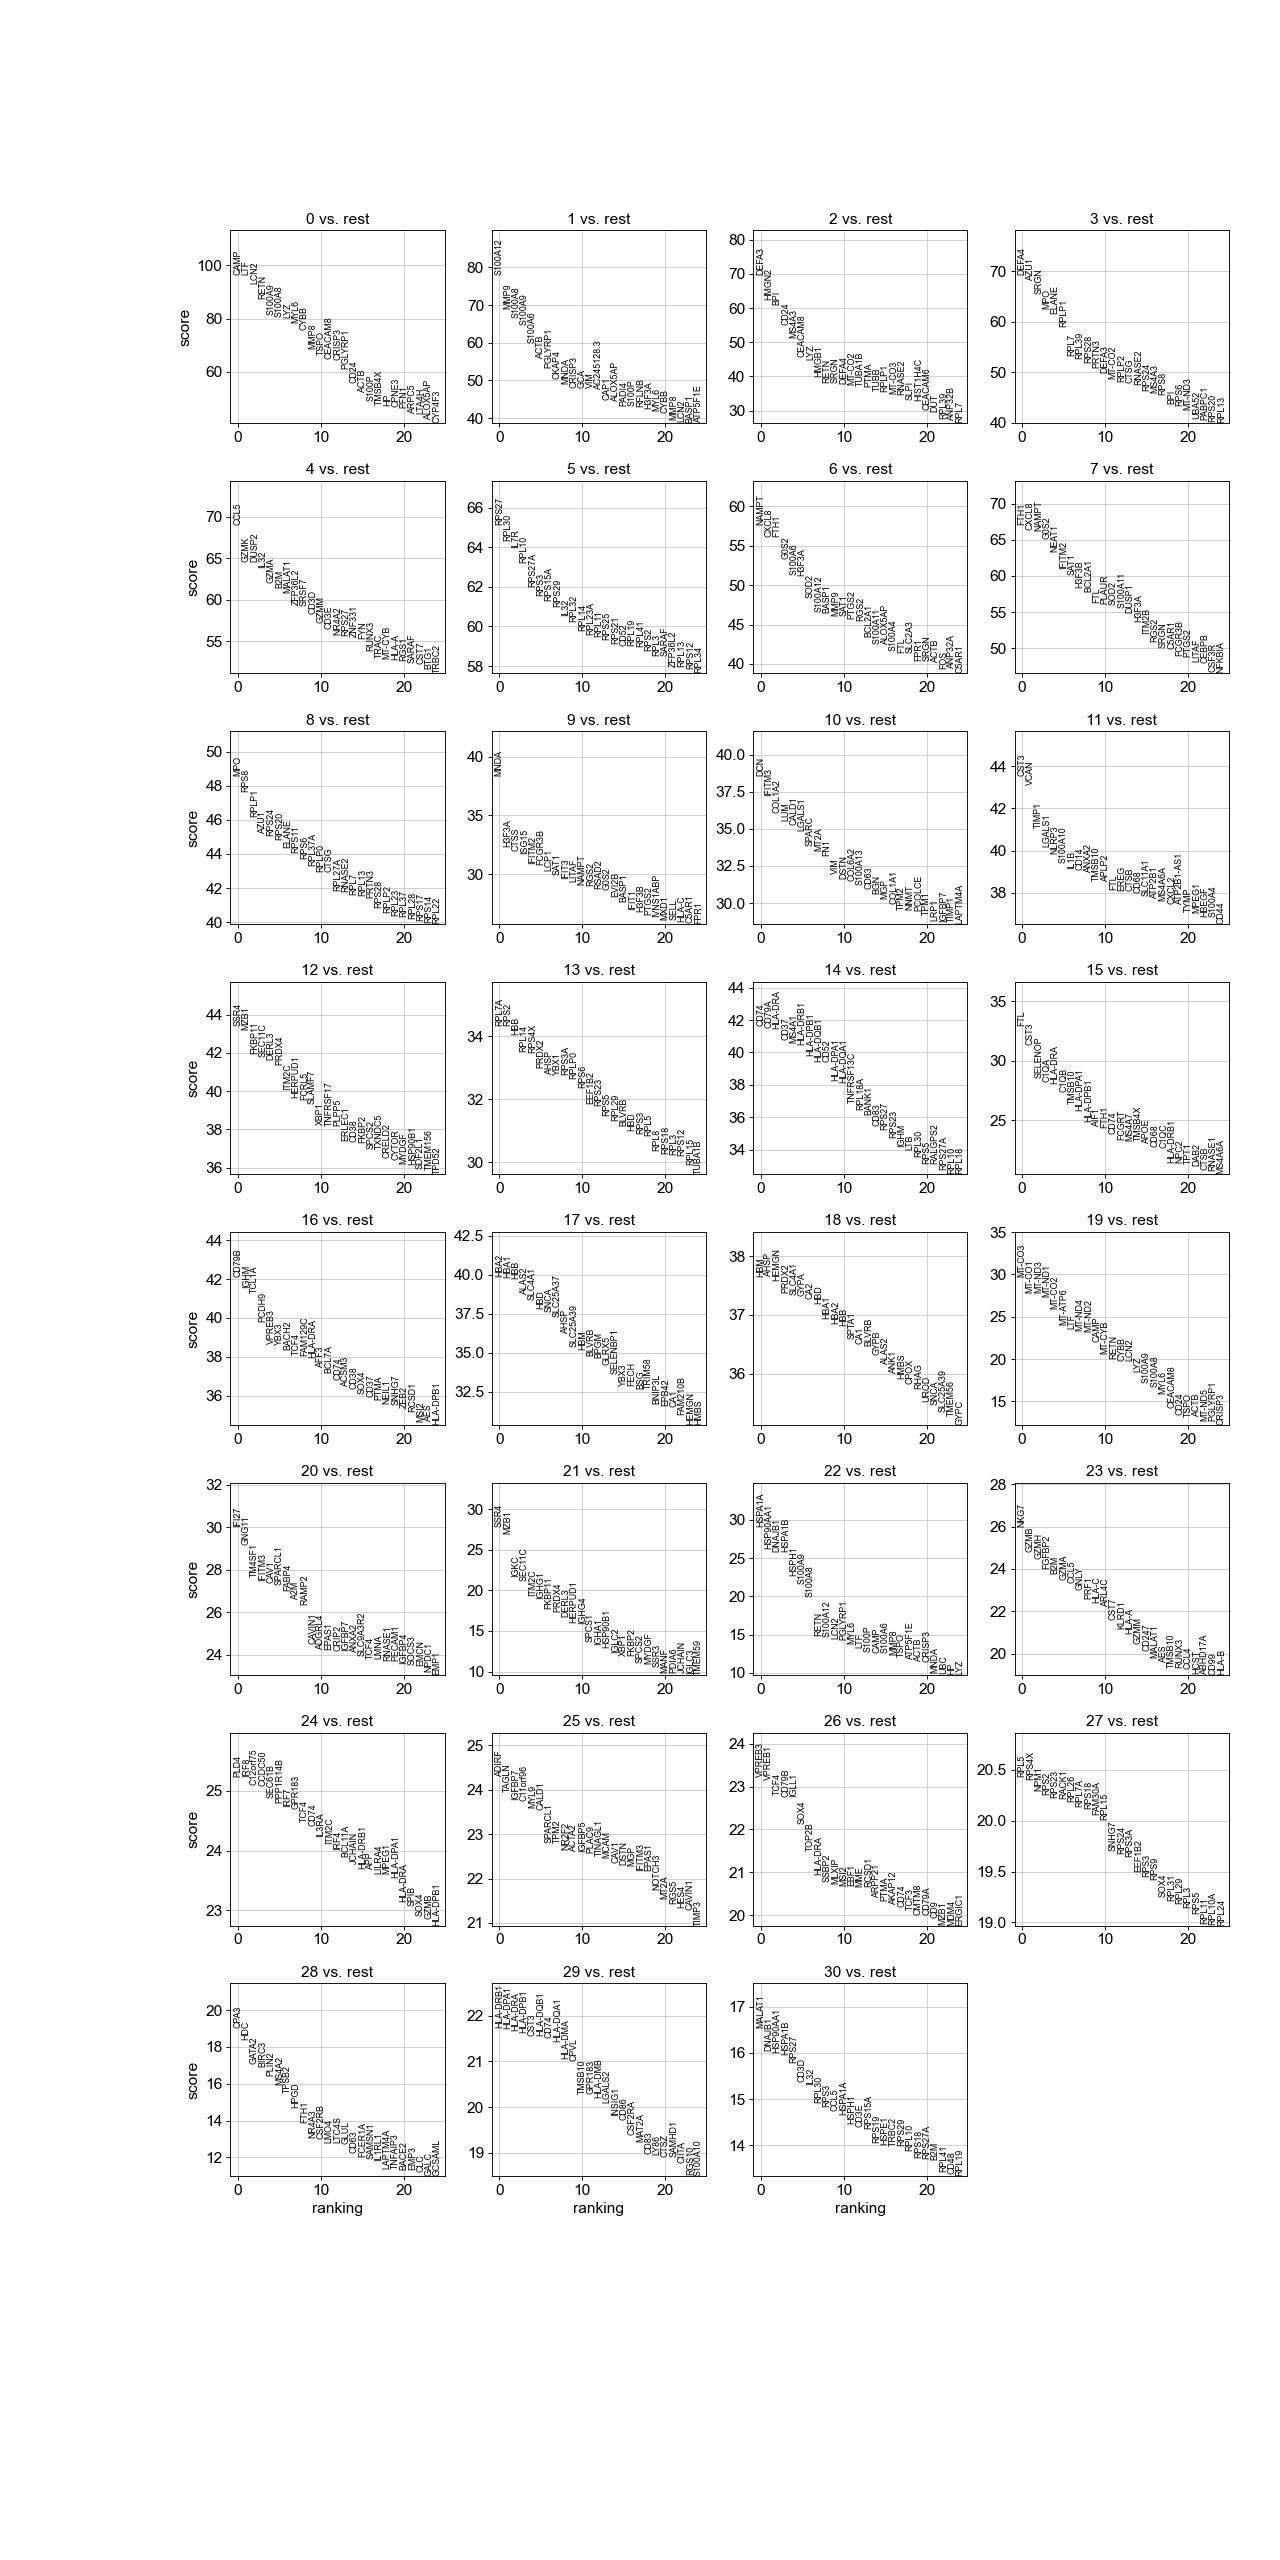

In [27]:
sc.settings.verbosity = 2
sc.tl.rank_genes_groups(data_all, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(data_all, n_genes=25, sharey=False)

ranking genes
    finished (0:02:36)


d:\Users\lee\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<IPython.core.display.Javascript object>


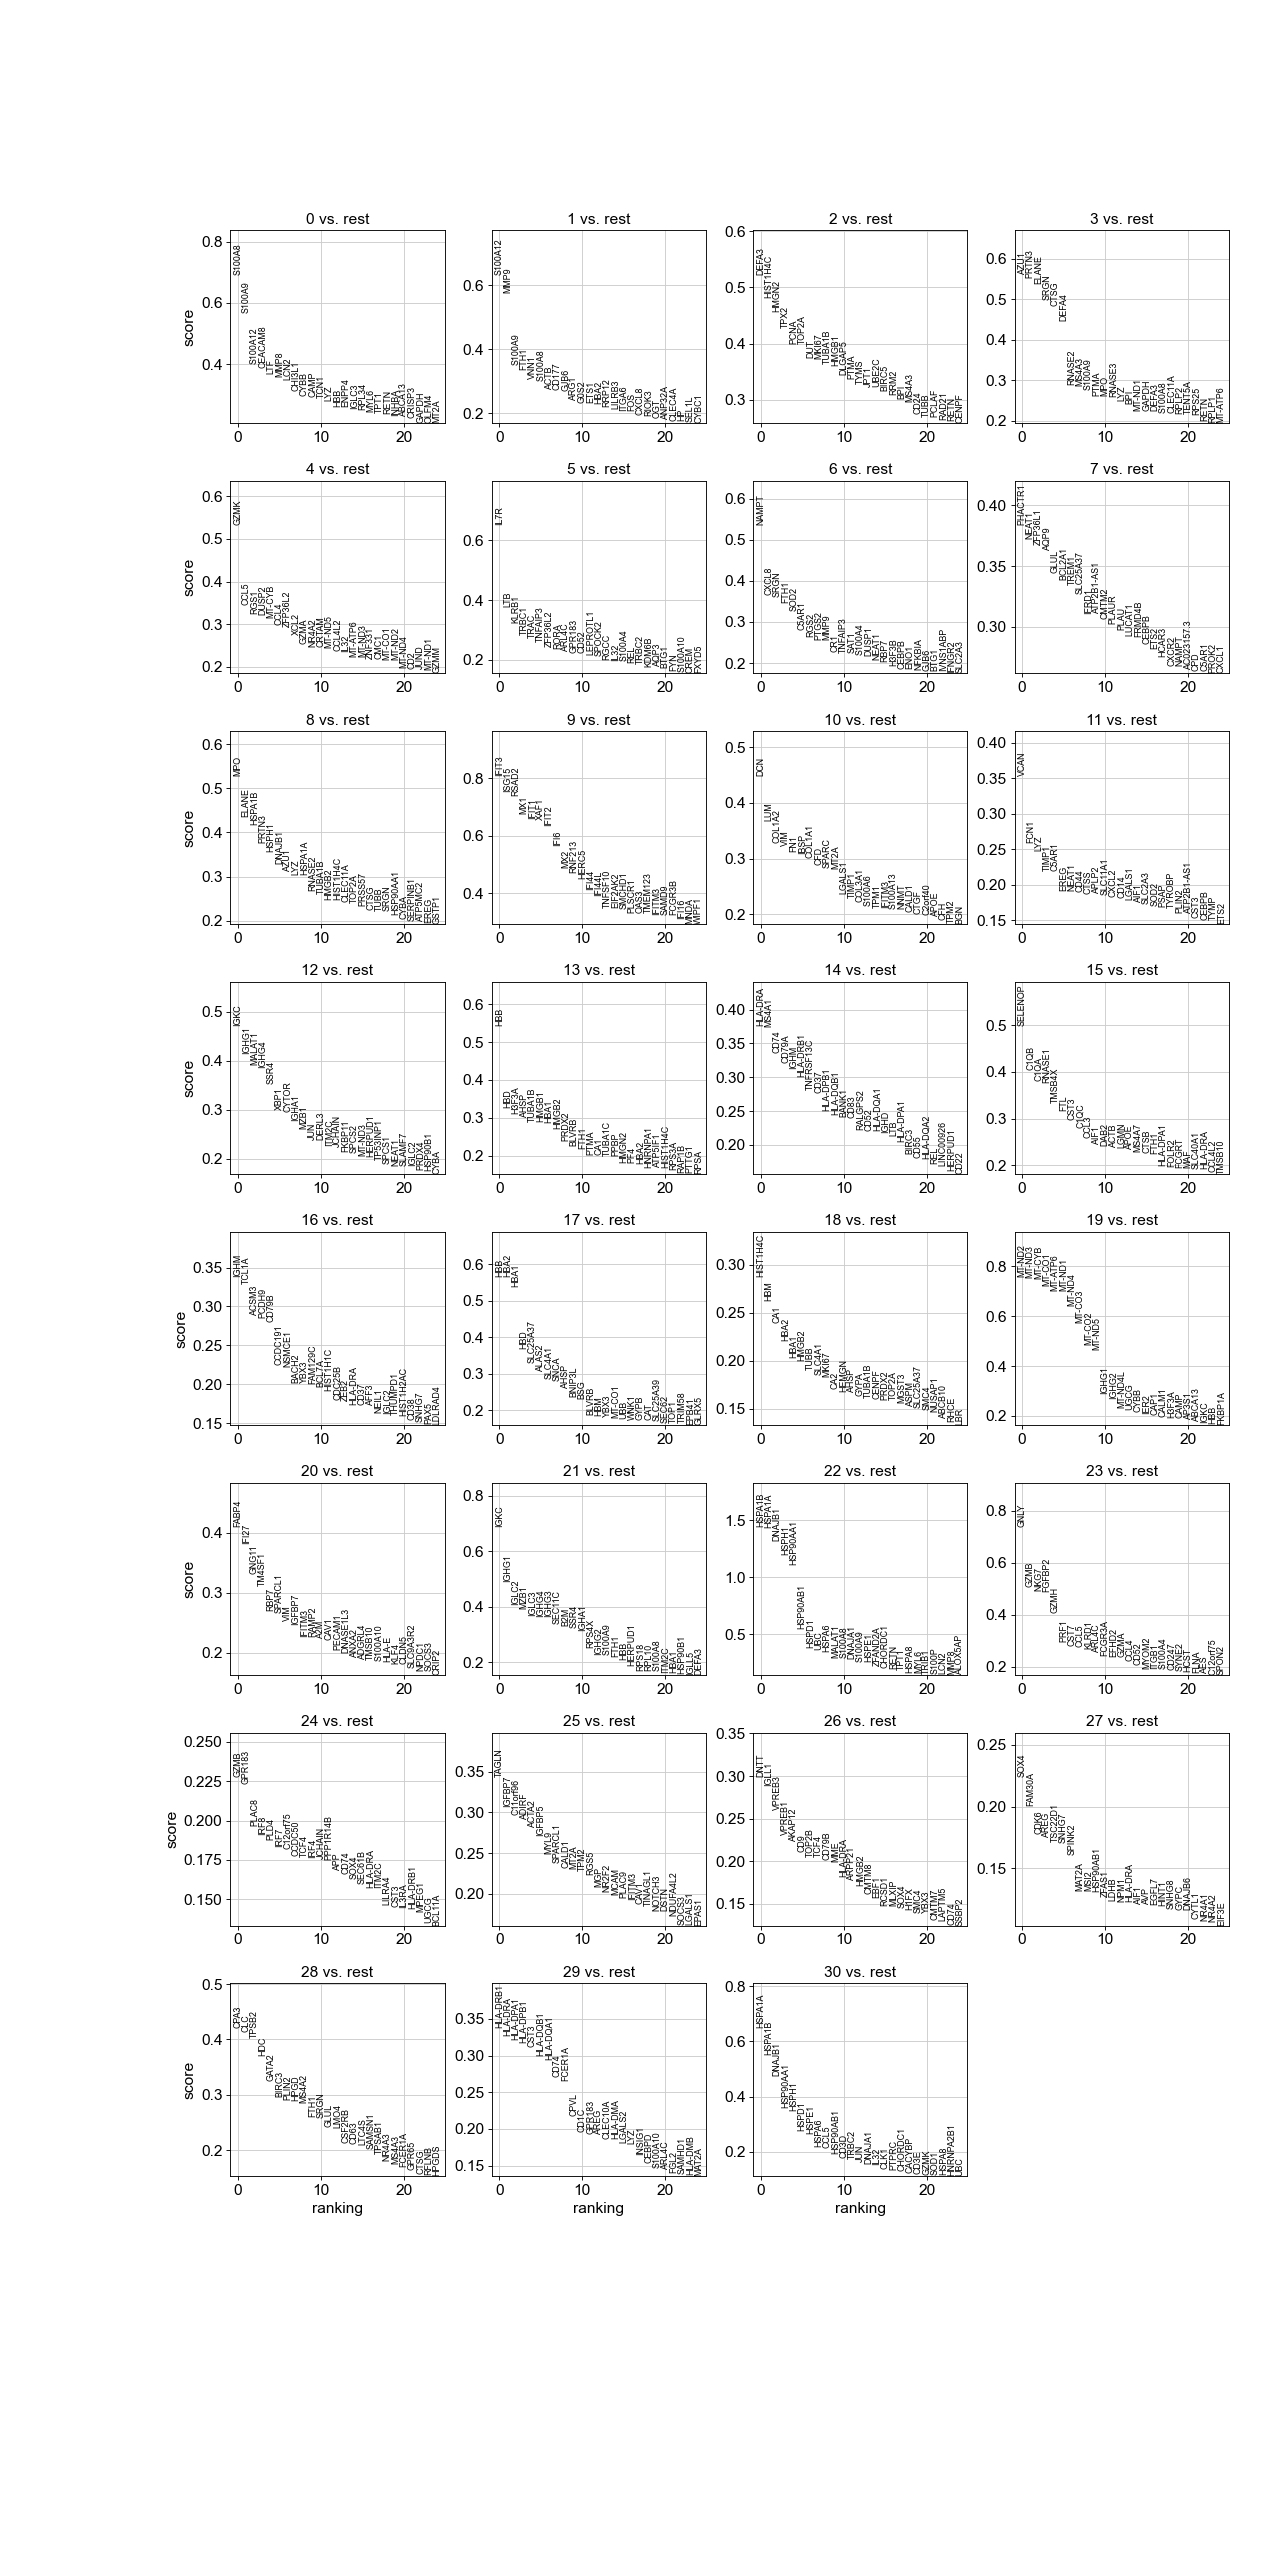

In [29]:
sc.tl.rank_genes_groups(data_all, 'leiden', method='logreg')
sc.pl.rank_genes_groups(data_all, n_genes=25, sharey=False)